In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Nacitaj tvare

In [2]:
# ziskavanie ciest k suborom s fotografiami
_, _, files = list(os.walk("photos_aligned_cropped"))[0]

faces = dict()

# nacitanie fotografii
for f in files:
    f.encode('unicode_escape')
    img = cv2.imread("photos_aligned_cropped/"+f)
    # zmena farebnosti z farebnych na grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces[f] = gray

### Priemerna tvar

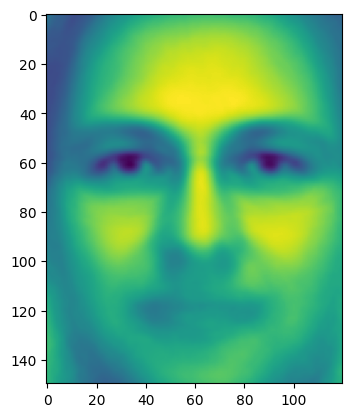

In [3]:
avg_face = np.zeros(18000)    
# vypocet suctu vsetkych tvari
for face in faces.values():
    # zmena rozmerov, z fotografie na vektor
    face_vec = face.flatten()
    avg_face += face_vec

# vydelenie poctom pre ziskanie priemernej tvare
avg_face = avg_face/len(faces)

#vykreslenie priemernej tvare
avg_face_img = avg_face.reshape(150, 120)
plt.imshow(avg_face_img)

### Rozdielny oproti priemernej tvary

In [4]:
# vypocet rozdiel nasich tvari od priemernej tvare
face_diffs = dict()
for name, face in faces.items():
    face_vec = face.flatten()
    face_diffs[name] = face_vec - avg_face

### Vypocitaj eigenfaces

In [5]:
# vytvorenie matice obsahujucej vektory forografii ako stlpce
A = np.matrix([i for i in face_diffs.values()]).T
# vypocet matice (A^T)*(A)
AtA = np.matmul(A.T, A)
# vypocet eigenvektor matice (A^T)*(A)
_, vec = np.linalg.eigh(AtA)
# vypocet eigenfaces pre maticu A
eigen = np.array([np.array(np.matmul(A, v.T).T)[0] for v in vec]).T

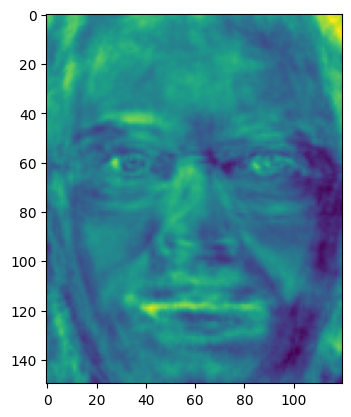

In [6]:
# ukazka jeden eigenface
plt.imshow(eigen.T[1].reshape(150, 120))

### Vypocitaj koeficienty eigenfaces pre jednotlive tvare

In [7]:
%%time
# vypocet koeficientov eigenfaces pre jednotlive fotografie
face_vals = dict()
for name, face in face_diffs.items():
    face_vals[name] = np.linalg.lstsq(eigen, face, rcond=None)[0]

CPU times: total: 1min 19s
Wall time: 2min 8s


In [8]:
# rozdelenie tvari do 5 klusterov
kmeans = KMeans(n_clusters=5, random_state=0, algorithm="elkan").fit(list(face_vals.values()))

In [9]:
# vypisanie oznaceni jednotlivych tvari
kmeans.labels_

array([1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 4, 1, 1, 1, 1, 4, 1, 0, 2, 2,
       4, 4, 1, 1, 3, 1, 4, 2, 1, 1, 4, 4, 1, 1, 4, 2, 0, 1, 1, 0, 1, 4,
       1, 0, 1, 4, 4, 1, 1, 0, 1, 4, 1, 0, 4, 4, 1, 1, 2, 2, 1, 0, 3, 4,
       4, 4, 2, 1, 0, 1, 4, 2, 2, 1, 1, 2, 0, 1, 3, 1, 1, 0, 0, 2, 0, 1,
       1, 4, 1, 0, 3, 0, 2, 2, 0, 4, 0, 4, 1, 3, 1, 0, 1, 0, 1, 1, 1, 4,
       2, 0, 1, 0, 0, 2, 1, 4, 4, 0, 4, 1, 4, 4, 4, 4, 2, 4, 1, 1, 4, 3,
       1, 4, 2, 4, 1, 1, 4, 1, 0, 1, 0, 0, 2, 2, 0, 4, 4, 1, 3, 1, 1, 1,
       1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 4, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1,
       0, 4, 1, 2, 4, 2, 2, 2, 1, 4, 0, 1, 4, 1, 2, 0, 2, 2, 1, 4, 1, 1,
       4, 1, 1, 1, 4, 0, 4, 1, 1, 4, 1, 1, 2, 4, 4, 1, 4, 0, 1, 4, 1, 1,
       4, 4, 1, 1, 4, 0, 0, 4, 0, 4, 1, 1, 1, 2, 2, 1, 4, 0, 0, 4, 1, 0,
       0, 2, 1, 3, 2, 0, 1, 2, 3, 1, 4, 1, 1, 1, 0, 1, 0, 1, 1, 4, 2, 1,
       1, 4, 1, 2, 4, 1, 2, 4, 1, 4, 1])